In [22]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn - Copy.csv')
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [25]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

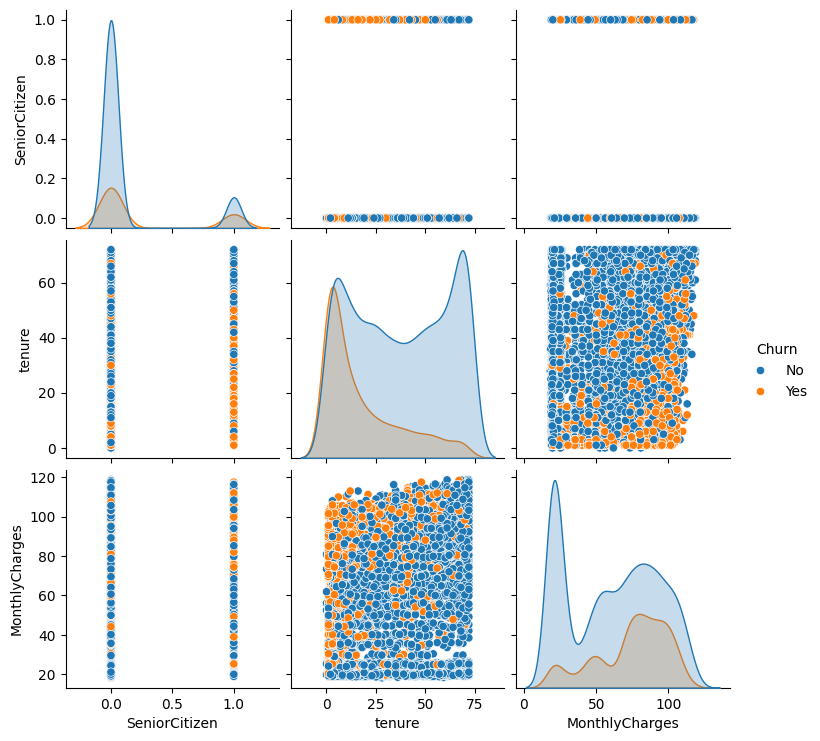

In [26]:
sns.pairplot(df,hue="Churn")

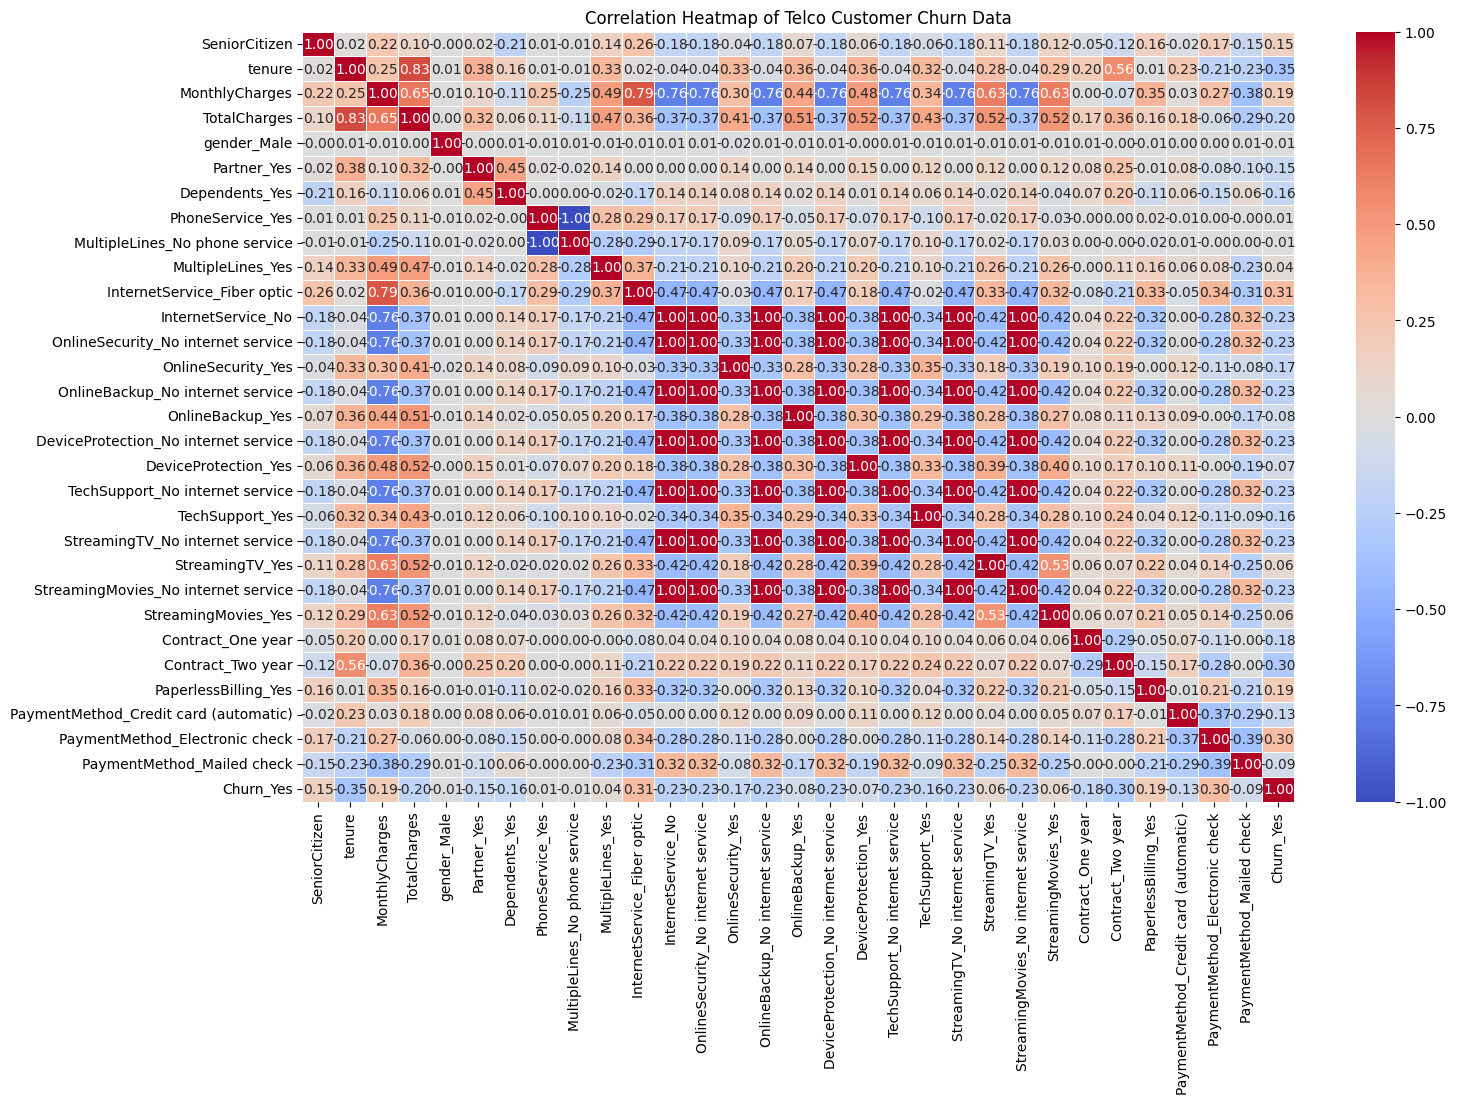

In [27]:
# converting TotalCharges column numeric column
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df_clean=df.drop(['customerID'],axis=1)
df_encoded=pd.get_dummies(df_clean,drop_first=True)

corr=df_encoded.corr()

plt.figure(figsize=(16,10))
sns.heatmap(corr,annot=True,fmt=".2f",cmap="coolwarm",linewidth="0.5")
plt.title("Correlation Heatmap of Telco Customer Churn Data")
plt.show()


In [28]:
features=['InternetService','MonthlyCharges','Contract','tenure','TotalCharges','PaymentMethod','TechSupport']
target='Churn'

In [29]:
#Encoding
df_model=df[features + [target]]
df_model =pd.get_dummies(df_model,drop_first=True)

In [30]:
#Train_test_split
x=df_model.drop('Churn_Yes',axis=1)
y=df_model['Churn_Yes']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [31]:
#Decision tree
tree=DecisionTreeClassifier(max_depth=5,random_state=42)
tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [32]:
#Model evaluation
y_pred=tree.predict(x_test)
print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred))
print("\nClassification Report:")
print(classification_report(y_test,y_pred))

Confusion matrix:
[[939  97]
 [180 193]]

Classification Report:
              precision    recall  f1-score   support

       False       0.84      0.91      0.87      1036
        True       0.67      0.52      0.58       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [33]:
#Decision tree diagram
plt.figure(figsize=(100,100))
plot_tree(tree,feature_names=x.columns,class_names=["No Churn","Churn"],filled=True,fontsize=30)
plt.title("Decision tree for customer churn prediction",fontsize=30)
plt.show()

In [34]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import joblib  # For saving/loading model (optional)

# Assume 'tree' is your trained model and you have used these features:
# ['InternetService', 'MonthlyCharges', 'Contract', 'tenure', 'TotalCharges', 'PaymentMethod', 'TechSupport']

# Get user input
def get_customer_input():
    print("Enter customer information:")
    data = {
        'InternetService': input("InternetService (DSL / Fiber optic / No): "),
        'MonthlyCharges': float(input("MonthlyCharges (e.g., 85.5): ")),
        'Contract': input("Contract (Month-to-month / One year / Two year): "),
        'tenure': int(input("Tenure (number of months with company): ")),
        'TotalCharges': float(input("TotalCharges (e.g., 300.0): ")),
        'PaymentMethod': input("PaymentMethod (e.g., Electronic check / Mailed check / Bank transfer (automatic) / Credit card (automatic)): "),
        'TechSupport': input("TechSupport (Yes / No / No internet service): ")
    }
    return data

# Predict churn using trained model
def predict_churn_user_input(model):
    raw_input = get_customer_input()
    input_df = pd.DataFrame([raw_input])

    # One-hot encoding
    input_encoded = pd.get_dummies(input_df)

    # Add missing columns
    for col in model.feature_names_in_:
        if col not in input_encoded.columns:
            input_encoded[col] = 0

    # Align column order
    input_encoded = input_encoded[model.feature_names_in_]

    # Predict
    prediction = model.predict(input_encoded)[0]
    print("Predicted Churn:", "Yes" if prediction == 1 else "No")

# Example usage:
# Make sure you have already trained your model as 'tree'
# predict_churn_user_input(tree)

In [35]:
predict_churn_user_input(tree)

Enter customer information:


InternetService (DSL / Fiber optic / No):  DSL
MonthlyCharges (e.g., 85.5):  52
Contract (Month-to-month / One year / Two year):  One year
Tenure (number of months with company):  23
TotalCharges (e.g., 300.0):  92
PaymentMethod (e.g., Electronic check / Mailed check / Bank transfer (automatic) / Credit card (automatic)):  Mailed check
TechSupport (Yes / No / No internet service):  Yes


Predicted Churn: No


In [36]:
import joblib
import os

# Create the 'model' directory if it doesn't exist
os.makedirs('model', exist_ok=True)

# Save the trained model
joblib.dump(tree, 'model/churn_model.pkl')

# Save the column names used for training
joblib.dump(list(x.columns), 'model/feature_columns.pkl')



['model/feature_columns.pkl']